In [1]:
import os 
import numpy as np
import pandas as pd
from scipy.integrate import odeint, solve_ivp
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
def virusSpreading(t, y, beta, mu, nu):
    
    S = y[0]
    I = y[1]
    R = y[2]
    D = y[3]
    
    res1 = -beta*S*I
    res2 = beta*S*I-mu*I
    res3 = nu*mu*I
    res4 = (1-nu)*mu*I
    
    return [res1, res2, res3, res4]


In [3]:
def simVirusSpreading(beta, verbose):
    
    S0 =99
    I0 =1
    R0 =0
    D0 =0
    y0 = [S0, I0, R0, D0]
    
    # number of time points
    n = 400

    # time points
    tspan = np.linspace(0, 500, n)
    
    mu =0.0175
    nu =0.99
#     res = solve_ivp(fun = virusSpreading(t, y0, beta, mu, nu), t_span = (0, 500), y0= y0 )
    res = solve_ivp(lambda t, y: virusSpreading(t, y, beta, mu, nu), 
                          [tspan[0], tspan[-1]], y0, t_eval=tspan)
#     print(res)
#     [tSol, ySol] = ode45(@(t,y) virusSpreading(t, y,beta, mu, nu), t_span, y0);
    if verbose:
        v = res.y[0, :]
        u = res.y[1, :]
        z = res.y[2, :]
        g = res.y[3, :]
        
        plt.figure(figsize=(12, 6))
        plt.plot(tspan,v,'b-',label='Susceptible')
        plt.plot(tspan,u,'r-',label='Infected')
        plt.plot(tspan,z,'y-',label='Recovered')
        plt.plot(tspan, g,'c-',label='Dead')
        plt.ylabel('tspan')
        plt.xlabel('values')
        plt.legend(loc='best')
        plt.show()

#     print(stats.describe(res.t))
    
    tSol = res.t.T
    tSol = np.expand_dims(tSol, axis=1)
#     print(tSol.shape)
    ySol = res.y.T
#     print(ySol.shape)
    
    tySol = np.hstack((tSol, ySol))
#     print(tySol.shape)
    
    return tySol



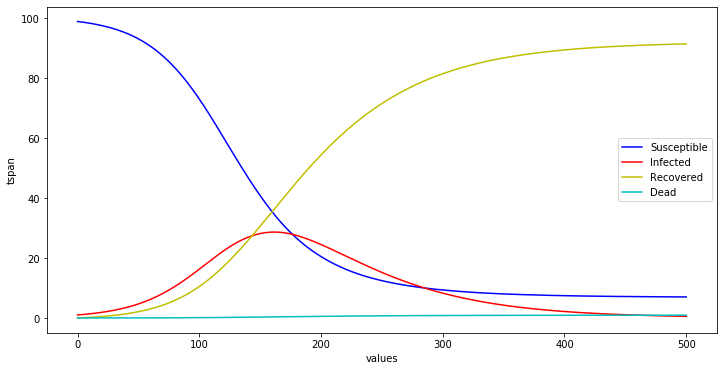

In [4]:
beta=0.0005
r = simVirusSpreading(beta, True)


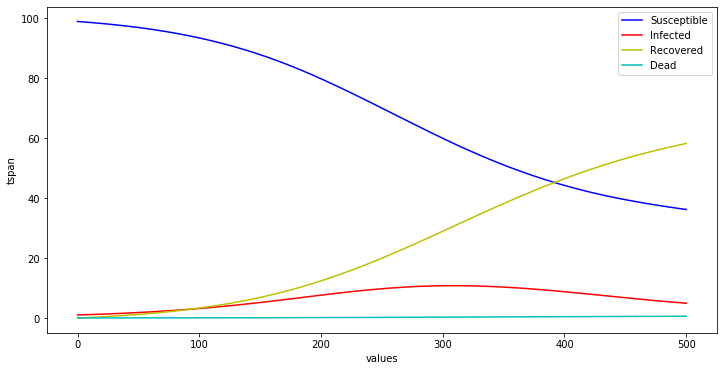

In [5]:
beta=0.0003
r2 = simVirusSpreading(beta, True)


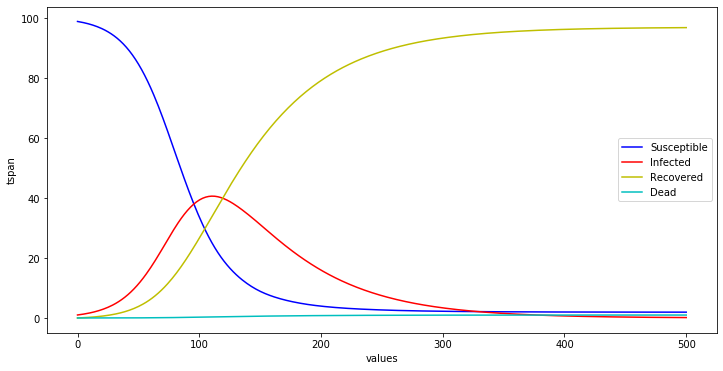

In [6]:
beta=0.0007
r3 = simVirusSpreading(beta, True)


In [7]:
countries = 51
verbose = False

if verbose:
    countries = 1

features = np.zeros((countries, 8))
betas = np.random.normal(0.0005, 0.0001, (1,countries))

for i in range(countries):
    res = simVirusSpreading(betas[0][i], False)
    times = res[:, 0] # Add randomness to the observations
#     print(times.shape)
    rand_res = np.zeros((np.size(res[:, 0]),5))
#     print(rand_res.shape)
    rand_res[:, 0] = times
    
    # custom function
    def func(x):
        return np.random.normal(0,0.025*x)+x

    custom_func = np.vectorize(func)
    
    for j in range(1, 5, 1):
#         print(j)
    
        rand_res[:, j] = custom_func(res[:, j])
    
    if verbose:
        plt.figure(figsize=(12, 8))
        # 1. Susceptible
        plt.plot(times, res[:, 1], '-', label='Susceptible')
        plt.plot(times,rand_res[:, 1], '-', label='Susceptible_sim')
        # 2. Recovered
        plt.plot(times,res[:, 2], '-', label='Recovered')
        plt.plot(times, rand_res[:, 2], '-', label='Recovered_sim')
        # 3. Infected
        plt.plot(times, res[:, 3], '-', label='Infected')
        plt.plot(times,rand_res[:, 3], '-', label='Infected_sim')
        # 4. Dead 
        plt.plot(times,res[:, 4], '-', label='Dead')
        plt.plot(times, rand_res[:, 4], '-', label='Dead_sim')

        plt.ylabel('')
        plt.xlabel('time')
        plt.legend(loc='best')
        plt.show()
    
    ti = times[times<=50]
    n_50 = rand_res[len(ti), 2]
    d_50 = rand_res[len(ti), 2]-rand_res[len(ti)-1, 2]
    ti = times[times<=150]
    n_150 = rand_res[len(ti), 2]
    d_150 = rand_res[len(ti), 2]-rand_res[len(ti)-1, 2]
    ti = times[times<=300]
    n_300 = rand_res[len(ti), 2];
    d_300 = rand_res[len(ti), 2]-rand_res[len(ti)-1, 2]
    ii = np.argmax(rand_res[:,2]) 
    M = rand_res[:, 2][ii]
    t_peak = times[ii]
    
    
    if verbose :
        print(f'n_50= {n_50:.4f}, n_150={n_150:.4f}, n_300={n_300:.2f}\n d_50={d_50:.2f}, d_150={d_150:.2f}, d_300={d_300:.2f}\n t_peak={t_peak:.2f}\n x_500={rand_res[-1, 4]:.4f}\n')
        
    features[i, :] = [n_50, n_150, n_300, d_50, d_150, d_300, t_peak,rand_res[-1, 4]]
    

# save array into csv file
np.savetxt("epidemic_process.csv", features, 
              delimiter = ",")


In [8]:
features = pd.read_csv('epidemic_process.csv',
            header=0, 
            names=['n_50', 'n_150','n_300', 
                   'd_50', 'd_150', 'd_300',
                    't_peak', 'rand_res_lst'])
print(features.head())


        n_50      n_150      n_300      d_50     d_150     d_300      t_peak  \
0  10.871752  31.731199   3.577007  0.885145 -0.332579  0.119867  115.288221   
1   3.562699  21.506174  10.575284  0.124304  0.329844 -0.365451  184.210526   
2  10.000616  32.320395   3.740579  0.717798 -0.250636 -0.181363  120.300752   
3   6.892389  32.382881   5.856731  0.626500 -0.138253 -0.035170  141.604010   
4   4.175345  24.275372   9.675386  0.482101  0.419878 -0.022058  172.932331   

   rand_res_lst  
0      1.004567  
1      0.888335  
2      0.926079  
3      0.955523  
4      0.918291  


Statistics of N_{50}: 
DescribeResult(nobs=50, minmax=(1.5048389303306982, 13.013201451328005), mean=5.012541205018104, variance=6.135766364155219, skewness=1.1573549704628834, kurtosis=1.1708258843801795)


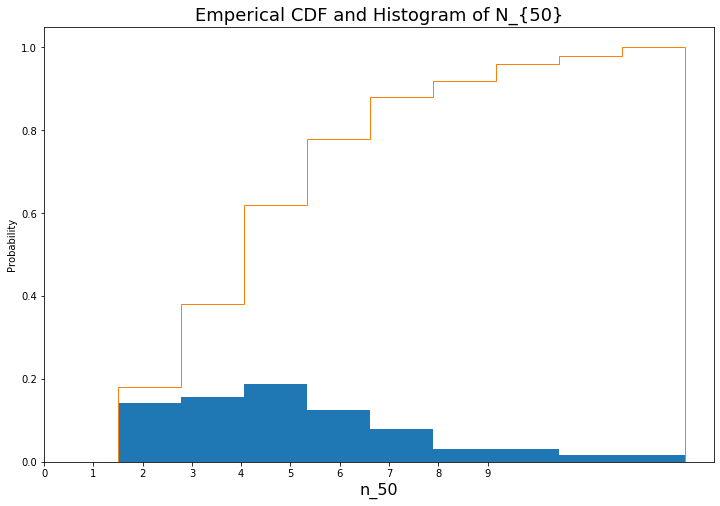

In [9]:
print('Statistics of N_{50}: ')
print(stats.describe(features.iloc[:, 0]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 0],bins=9,density=True)
plt.hist(features.iloc[:, 0],bins=9, density=True, cumulative=True, label='CDF', histtype='step')
plt.xlabel("n_50", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,10))
plt.title("Emperical CDF and Histogram of N_{50}", size= 18)
plt.show()


Statistics of N_{150}: 
DescribeResult(nobs=50, minmax=(3.314095923536161, 34.15608182159531), mean=24.025676917352683, variance=74.96729227395579, skewness=-0.8043533199014397, kurtosis=-0.4044661610101752)


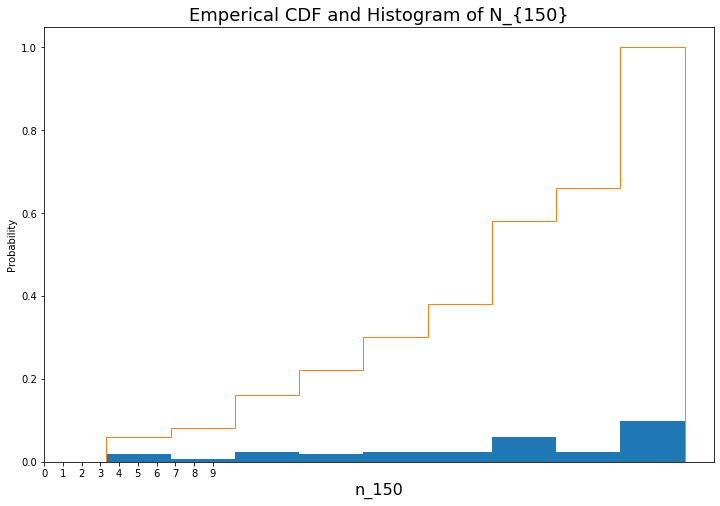

In [10]:
print('Statistics of N_{150}: ')
print(stats.describe(features.iloc[:, 1]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 1],bins=9,density=True)
plt.hist(features.iloc[:, 1],bins=9, density=True, cumulative=True, label='CDF', histtype='step')
plt.xlabel("n_150", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,10))
plt.title("Emperical CDF and Histogram of N_{150}", size= 18)
plt.show()


Statistics of N_{300}: 
DescribeResult(nobs=50, minmax=(2.904440082998338, 14.156457712592836), mean=8.707800950281463, variance=10.75033741193218, skewness=0.15380079756257897, kurtosis=-1.0684469499613958)


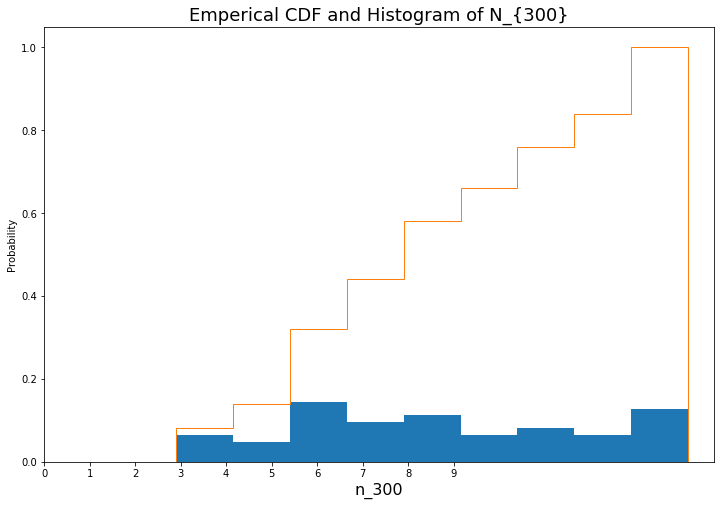

In [11]:
print('Statistics of N_{300}: ')
print(stats.describe(features.iloc[:, 2]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 2],bins=9,density=True)
plt.hist(features.iloc[:, 2],bins=9, density=True, cumulative=True, label='CDF', histtype='step')
plt.xlabel("n_300", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,10))
plt.title("Emperical CDF and Histogram of N_{300}", size= 18)
plt.show()


Statistics of D_{50}: 
DescribeResult(nobs=50, minmax=(-0.1017590089254208, 0.9892264344223952), mean=0.27210073916111355, variance=0.06834936207401357, skewness=0.9948511820033723, kurtosis=0.22554539380184124)


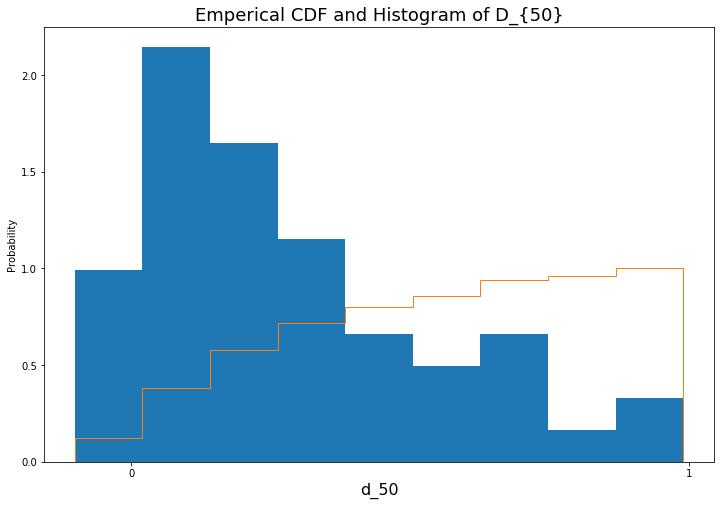

In [12]:
print('Statistics of D_{50}: ')
print(stats.describe(features.iloc[:, 3]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 3],bins=9,density=True)
plt.hist(features.iloc[:, 3],bins=9, density=True, 
         cumulative=True, label='CDF', histtype='step')
plt.xlabel("d_50", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,2))
plt.title("Emperical CDF and Histogram of D_{50}", size= 18)
plt.show()


Statistics of D_{150}: 
DescribeResult(nobs=50, minmax=(-2.0021601846154766, 1.880998387757188), mean=-0.07749209262487497, variance=0.49611152306621353, skewness=-0.07774439429714335, kurtosis=0.9761942881564867)


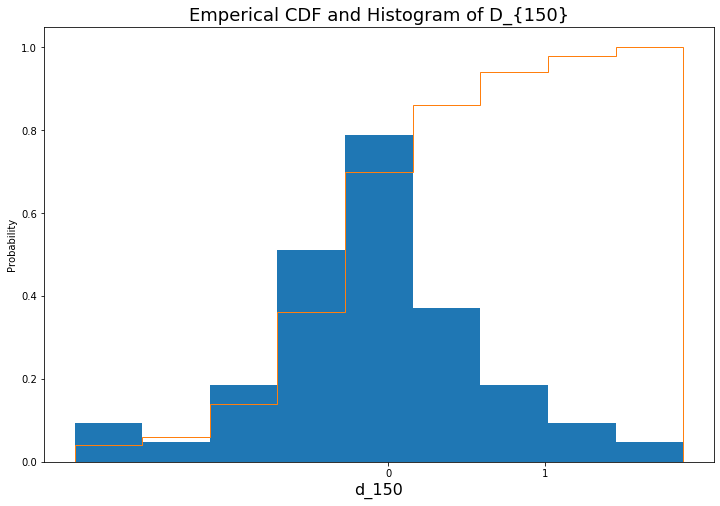

In [13]:
print('Statistics of D_{150}: ')
print(stats.describe(features.iloc[:, 4]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 4],bins=9,density=True)
plt.hist(features.iloc[:, 4],bins=9, density=True, 
         cumulative=True, label='CDF', histtype='step')
plt.xlabel("d_150", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,2))
plt.title("Emperical CDF and Histogram of D_{150}", size= 18)
plt.show()


Statistics of D_{300}: 
DescribeResult(nobs=50, minmax=(-0.951913541164604, 0.44794266699776486), mean=-0.1578133553749879, variance=0.10049696676186717, skewness=-0.5637571259340562, kurtosis=0.12039441035052034)


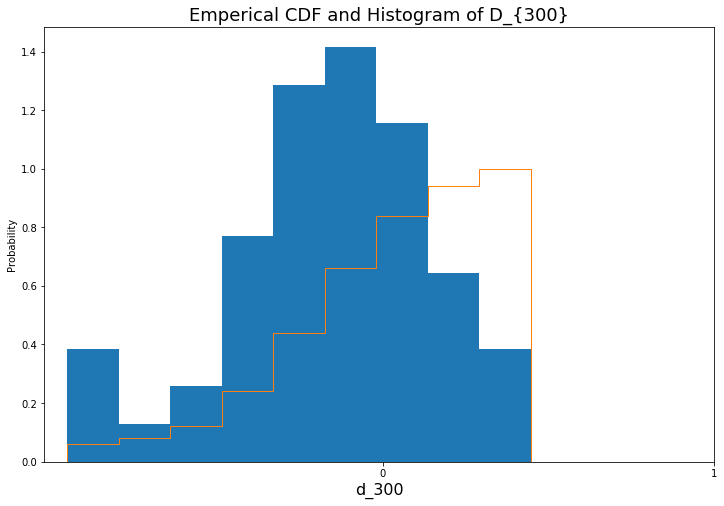

In [14]:
print('Statistics of D_{300}: ')
print(stats.describe(features.iloc[:, 5]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 5],bins=9,density=True)
plt.hist(features.iloc[:, 5],bins=9, density=True, 
         cumulative=True, label='CDF', histtype='step')
plt.xlabel("d_300", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,2))
plt.title("Emperical CDF and Histogram of D_{300}", size= 18)
plt.show()


Statistics of Tpeak: 
DescribeResult(nobs=50, minmax=(107.76942355889726, 360.90225563909775), mean=177.9699248120301, variance=2993.423536335597, skewness=1.617755469141629, kurtosis=2.8047029878191445)


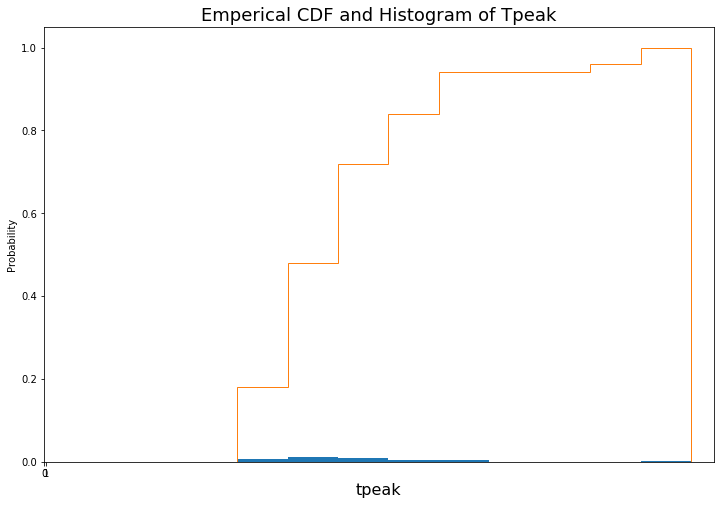

In [15]:
print('Statistics of Tpeak: ')
print(stats.describe(features.iloc[:, 6]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 6],bins=9,density=True)
plt.hist(features.iloc[:, 6],bins=9, density=True, 
         cumulative=True, label='CDF', histtype='step')
plt.xlabel("tpeak", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,2))
plt.title("Emperical CDF and Histogram of Tpeak", size= 18)
plt.show()


Statistics of X500: 
DescribeResult(nobs=50, minmax=(0.4192310511755383, 1.0045667055838448), mean=0.8833996044853795, variance=0.013321028662876802, skewness=-2.376913443132907, kurtosis=6.393774166258629)


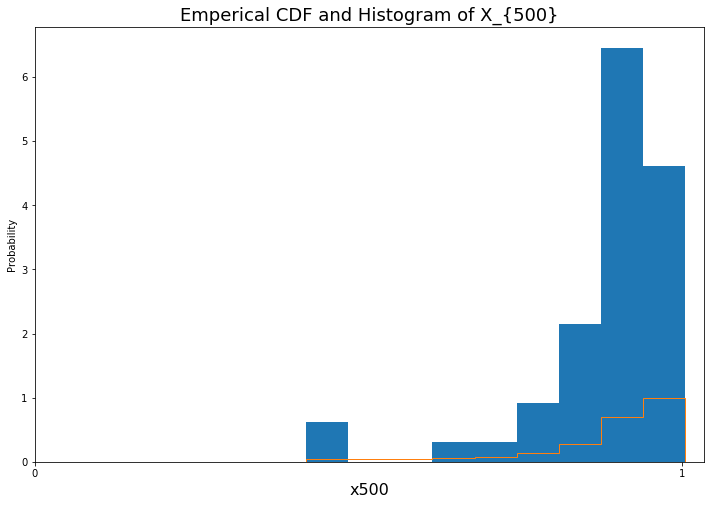

In [16]:
print('Statistics of X500: ')
print(stats.describe(features.iloc[:, 7]))

plt.figure(figsize=(12, 8))
plt.hist(features.iloc[:, 7],bins=9,density=True)
plt.hist(features.iloc[:, 7],bins=9, density=True, 
         cumulative=True, label='CDF', histtype='step')
plt.xlabel("x500", size=16)
plt.ylabel("Probability")
plt.xticks(np.arange(0,2))
plt.title("Emperical CDF and Histogram of X_{500}", size= 18)
plt.show()


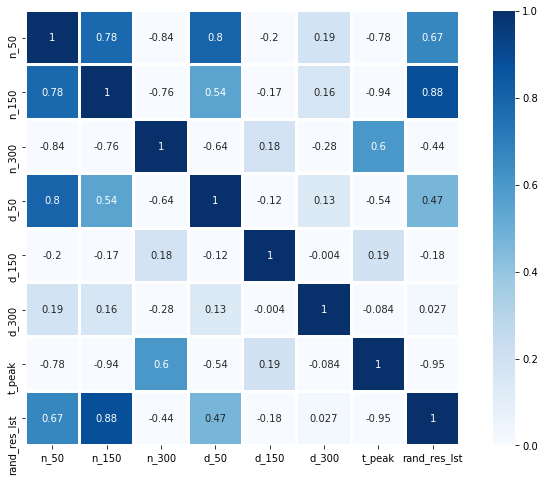

In [17]:
import seaborn as sns
    
#ploting heatmap for correlation

# plt.matshow(dataframe.corr())
# plt.show()

plt.figure(figsize=(12, 8))
ax = sns.heatmap(pd.DataFrame(features).corr(), 
                 annot=True, linewidths=2, vmax=1, 
                 vmin=0, square=True, cmap='Blues')


In [30]:
import scipy
import scipy.stats as st


def distribution_fitting(feature):

    distnames =["genextreme","expon","gamma"] 
    values_must_be_positive =["expon","gamma"];

    x_values = np.linspace(np.min(feature), np.max(feature), num=50)
    
    
    for dn in distnames:
        
#         c = 0 if dn in values_must_be_positive == True else 1
        
        if np.min(feature) < 0 and len((distnames.index(dn))):
            continue
      
        # fit distribution on data
        dist = getattr(st, dn)
        param0 = dist.fit(feature, floc=0)
        # Applying the Kolmogorov-Smirnov test
        t0 = st.kstest(feature, dist.cdf, args=param0)
        # Applying chi-square tese
        t1 = st.chisquare(feature, ddof=len(param0))
        # if p-value is less than .05, we reject the null hypothesis
        #  is 1 if the test rejects the null hypothesis at the 5% significance level, or 0 otherwise.
        res1 = 1 if t0[1]<0.05 else 0
        res2 = 1 if t1[1]<0.05 else 0
        print(res1)
        print(res2)
            
        if (res1 == 0) | (res2 == 0) :
            print(f'{dn} with 5%% significance level\n')
            
            plt.figure(figsize=(12, 8))
            
            plt.hist(feature, density=True, 
                 cumulative = True, alpha=0.5,
                 histtype='step', label = 'Empirical CDF')
            #
            plt.plot(x_values, dist(*param0).cdf(x_values), label = f'{dn} CDF')
            plt.plot(x_values, dist(*param0).pdf(x_values), label = f'{dn} PDF')
            plt.title(f"{dn} fit data")
            plt.xlabel("")
            plt.legend(loc='best')
            plt.show()
            
        else:
            print(f'Not {str(dn)} with 5% significance level\n');
            

1
0
genextreme with 5%% significance level



/home/quartermaine/anaconda3/envs/keras2/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2552: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


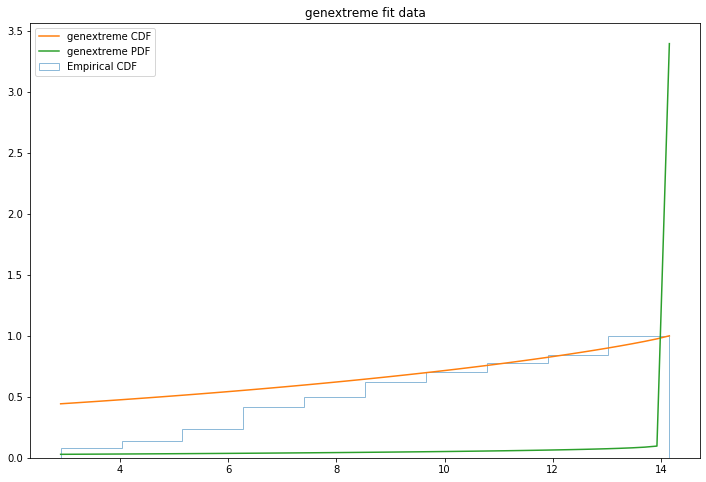

1
0
expon with 5%% significance level



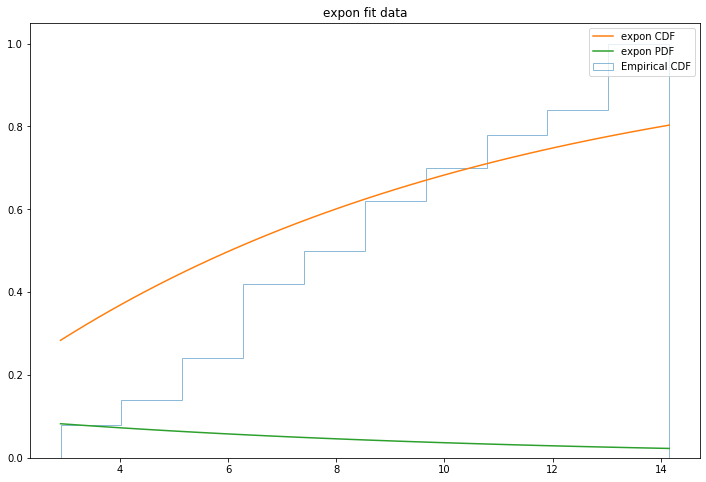

0
0
gamma with 5%% significance level



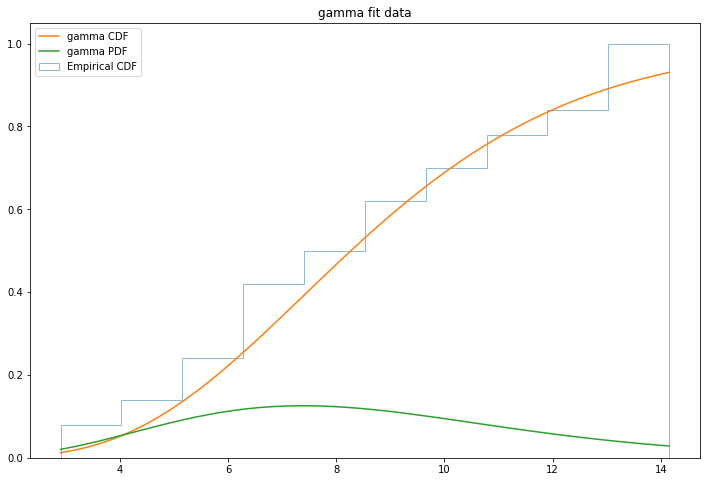

In [31]:
pd_n_50 = distribution_fitting(features.iloc[:, 2])
